In [1]:
from pycocotools.coco import COCO

val_json=r"/home/shinohara/Documents/YOLOX/datasets/white_cane_detection/annotations/grasped_dataset_val.json"
coco = COCO(val_json)


loading annotations into memory...
Done (t=1.41s)
creating index...
index created!


In [2]:
filenames=[coco_data["file_name"] for coco_data in coco.imgs.values()]

In [3]:
import pandas as pd

df_whitecane_anns=pd.DataFrame(data=coco.anns)

# df_anns

In [4]:
df_whitecane_anns=df_whitecane_anns.T

In [5]:
df_whitecane_anns.columns

Index(['id', 'image_id', 'bbox', 'area', 'iscrowd', 'category_id',
       'segmentation'],
      dtype='object')

In [6]:
GRASPED_CLASSES = (
    "person",
    "knife", 
    "white_cane", 
    "umbrella", 
    "plastic_bottle", 
    "phone", 
    "stick", 
    "maybe_knife", 
    "maybe_white_cane", 
    "maybe_umbrella", 
    "maybe_plastic_bottle", 
    "maybe_phone", 
    "maybe_stick"
)

<AxesSubplot: >

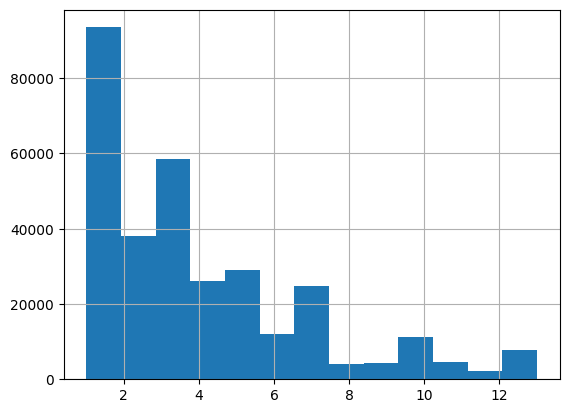

In [7]:
df_whitecane_anns["category_id"].hist(bins=13)

In [8]:
df_whitecane_anns.count()


id              316221
image_id        316221
bbox            316221
area            316221
iscrowd         316221
category_id     316221
segmentation    316221
dtype: int64

In [9]:
df_whitecane_anns["category_id"]

1         3
2         8
3         4
4         1
5         1
         ..
316217    7
316218    4
316219    9
316220    5
316221    3
Name: category_id, Length: 316221, dtype: object

In [10]:
df_category_id=df_whitecane_anns["category_id"]
all_samples=len(df_whitecane_anns["category_id"])
rand_category=df_whitecane_anns["category_id"].sample(n=round(all_samples * 0.05))

15811

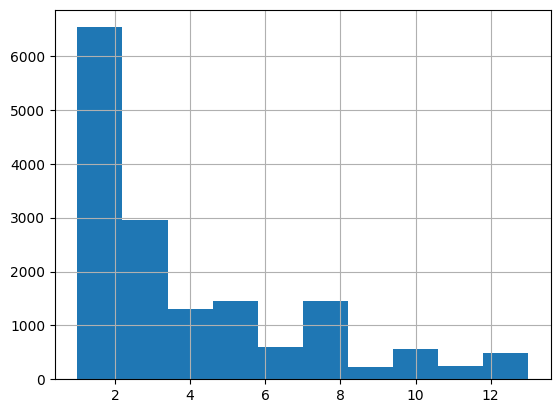

In [11]:
rand_category.hist()
rand_category.count()

In [12]:
rand_category_idx=rand_category.index

In [13]:
df_whitecane_anns=df_whitecane_anns.T
df_sub_anns=df_whitecane_anns[rand_category_idx]


In [14]:
df_sub_anns

,141529,104821,69808,216360,182565,227767,81029,218015,6128,45003,...,83024,275178,10141,53800,32617,59241,114962,111190,35328,89119
id,141529,104821,69808,216360,182565,227767,81029,218015,6128,45003,...,83024,275178,10141,53800,32617,59241,114962,111190,35328,89119
image_id,102051,75269,49892,156105,131712,164376,58136,157335,4338,32203,...,59665,198551,7211,38593,23190,42416,82741,79938,25148,64119
bbox,"[52.0, 233.0, 160.0, 55.0]","[318.0, 246.0, 59.0, 182.0]","[300.0, 344.0, 51.0, 123.0]","[221.0, 301.0, 20.0, 148.0]","[231.0, 175.0, 48.0, 27.0]","[413.0, 157.0, 75.0, 91.0]","[101.0, 172.0, 62.0, 32.0]","[164.0, 197.0, 39.0, 25.0]","[204.0, 382.0, 9.0, 98.0]","[193.0, 58.0, 188.0, 402.0]",...,"[334.0, 168.0, 35.0, 145.0]","[0.0, 319.0, 100.0, 192.0]","[31.0, 220.0, 21.0, 28.0]","[349.0, 294.0, 158.0, 188.0]","[67.0, 94.0, 173.0, 321.0]","[16.0, 0.0, 245.0, 511.0]","[258.0, 156.0, 104.0, 109.0]","[244.0, 94.0, 81.0, 221.0]","[226.0, 298.0, 22.0, 45.0]","[0.0, 164.0, 92.0, 239.0]"
area,8800,10738,6273,2960,1296,6825,1984,975,882,75576,...,5075,19200,588,29704,55533,125195,11336,17901,990,21988
iscrowd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
category_id,9,4,3,3,6,2,2,6,3,1,...,10,10,5,9,1,1,2,1,5,1
segmentation,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]


In [15]:
rand_category_img_id=df_sub_anns.T["image_id"].unique()

In [16]:
len(rand_category_img_id)

14880

# df_imgs

In [17]:
df_whitecane_imgs=pd.DataFrame(data=coco.imgs)
df_whitecane_imgs.count

<bound method DataFrame.count of                                                       0       \
file_name  202005_20200721_aug/val/white_stick_00194_56_0...   
height                                                   512   
width                                                    512   
id                                                         0   

                                                      1       \
file_name  csp_2nd_new_data/val/S2Avi143149-3_0084_i2_5_0...   
height                                                   512   
width                                                    512   
id                                                         1   

                                                      2       \
file_name  phase2_instance_aug/val/3660_094_20_1_cameraRi...   
height                                                   512   
width                                                    512   
id                                                         2   

    

In [18]:
df_sub_imgs=df_whitecane_imgs[rand_category_img_id]

# to json

In [19]:
df_sub_imgs_dict=df_sub_imgs.to_dict()
df_sub_anns_dict=df_sub_anns.to_dict()

In [20]:
df_sub_imgs_list=list(df_sub_imgs_dict.values())
df_sub_anns_list=list(df_sub_anns_dict.values())

In [21]:
categories=[
    {
        "supercategory": "Defect",
        "id": 1,
        "name": "person"
    },
    {
        "supercategory": "Defect",
        "id": 2,
        "name": "knife"
    },
    {
        "supercategory": "Defect",
        "id": 3,
        "name": "white_cane"
    },
    {
        "supercategory": "Defect",
        "id": 4,
        "name": "umbrella"
    },
    {
        "supercategory": "Defect",
        "id": 5,
        "name": "plastic_bottle"
    },
    {
        "supercategory": "Defect",
        "id": 6,
        "name": "phone"
    },
    {
        "supercategory": "Defect",
        "id": 7,
        "name": "stick"
    },
    {
        "supercategory": "Defect",
        "id": 8,
        "name": "maybe_knife"
    },
    {
        "supercategory": "Defect",
        "id": 9,
        "name": "maybe_white_cane"
    },
    {
        "supercategory": "Defect",
        "id": 10,
        "name": "maybe_umbrella"
    },
    {
        "supercategory": "Defect",
        "id": 11,
        "name": "maybe_plastic_bottle"
    },
    {
        "supercategory": "Defect",
        "id": 12,
        "name": "maybe_phone"
    },
    {
        "supercategory": "Defect",
        "id": 13,
        "name": "maybe_stick"
    }
]

In [22]:

coco_form={
    "images":df_sub_imgs_list,
    "categories":categories,
    "annotations":df_sub_anns_list
}

dir_path="/home/shinohara/Documents/YOLOX/datasets/white_cane_detection/annotations"
import json
with open(f"{dir_path}/grasped_sub_dataset_val.json", 'w') as f:
    json.dump(coco_form, f, indent=4,ensure_ascii=False)

In [23]:
len(df_sub_imgs_list)

14880

# Check annotation

In [4]:
df_whitecane_anns=df_whitecane_anns.T

df_whitecane_anns["b_x"]=df_whitecane_anns["bbox"].apply(lambda x: x[0])
df_whitecane_anns["b_y"]=df_whitecane_anns["bbox"].apply(lambda x: x[1])
df_whitecane_anns["b_width"]=df_whitecane_anns["bbox"].apply(lambda x: x[2])
df_whitecane_anns["b_height"]=df_whitecane_anns["bbox"].apply(lambda x: x[3])
df_whitecane_anns["b_avg_x"]=df_whitecane_anns["bbox"].apply(lambda x: (x[0]+x[2])/2)
df_whitecane_anns["b_avg_y"]=df_whitecane_anns["bbox"].apply(lambda x: (x[1]+x[3])/2)

<AxesSubplot: >

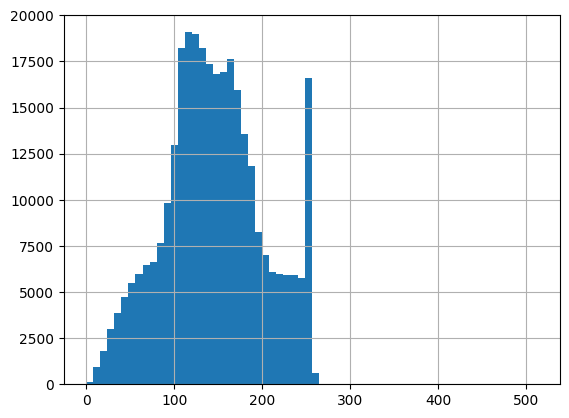

In [15]:
df_whitecane_anns["b_avg_x"].hist(bins=64, range=[0,512])

<AxesSubplot: >

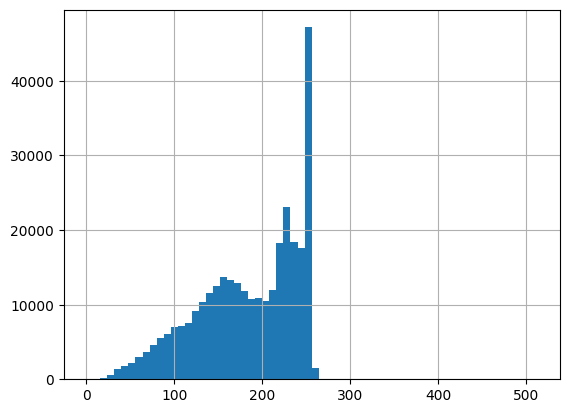

In [16]:
df_whitecane_anns["b_avg_y"].hist(bins=64,range=[0,512])

In [ ]:
import os
from tqdm import tqdm
dir_name="/home/shinohara/Documents/YOLOX/datasets/white_cane_detection/2nd"
exist_check=[filename for filename in tqdm(filenames) if os.path.exists(os.path.join(dir_name, filename))==False]

In [ ]:
exist_check

In [ ]:
from PIL import Image
import io
def is_not_image_corrupted(image_path):
    try:
        with open(image_path, "rb") as img_file:
            # 画像ファイルを読み込む
            img = Image.open(io.BytesIO(img_file.read()))
            # 画像が正しく読み込めるかどうかを確認
            img.verify()
            return True  # 画像が破損していない場合
    except Exception as e:
        return False  # 画像が破損している場合

In [ ]:
broke_check=[filename for filename in tqdm(filenames) if is_not_image_corrupted(os.path.join(dir_name, filename))==False]

In [ ]:
broke_check

In [ ]:
image_path=rf"{dir_name}/202005_20200721_aug/val/white_stick_00194_56_0.jpg"
with open(image_path, "rb") as img_file:
    # 画像ファイルを読み込む
    img = Image.open(io.BytesIO(img_file.read()))
    # 画像が正しく読み込めるかどうかを確認
    img.verify()
